In [2]:
import torch
import numpy as np

# Tensors


похожи на ndarrays (на массивы и матрицы, 
но тензоры могут работать на графических процессорах и др апп. ускорителях), <br>
тензоры используются для кодирования входных и выходных данных модели и ее параметров

**Initialization of tensors**

In [3]:
# Directly from data

data = [[1,2],[3,4]]
x_data = torch.tensor(data)

# From numpy array

np_array = np.array(data)
x_np = torch.from_numpy(np_array)

# From another tensor

# Новый тензор сохраняет свойства (форму, тип данных) тензора аргумента,
# если он явно не переопределен
x_ones = torch.ones_like(x_data) #retains the properties of x_data
print(f'Ones Tensor: \n {x_ones} \n')

x_rand = torch.rand_like(x_data, dtype=torch.float) #overrides the datatype pf x_data
print(f'Random Tensor: \n {x_rand} \n')

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.2913, 0.8471],
        [0.9278, 0.7325]]) 



In [4]:
# With random or const (zero/ones) values
shape=(3,3,)

rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.7744, 0.5244, 0.7994],
        [0.6083, 0.5997, 0.0960],
        [0.0784, 0.5947, 0.4419]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


# Attributes of a Tensor

Tensor attribute describe their shape, datatype, device they are stored on.

In [5]:
tensor = torch.rand(3, 4)

tensor.shape, tensor.dtype, tensor.device

(torch.Size([3, 4]), torch.float32, device(type='cpu'))

# Operations on Tensors

In [4]:
# Переместить наш тензор в GPU если он доступен

if torch.cuda.is_available():
    tensor = tensor.to('gpu')

Tensor API similar to NumPy API

In [8]:
tensor = torch.rand(4,4)

print('First row', tensor[0])
print('First column', tensor[:, 0])
print('Last column', tensor[:, -1])

First row tensor([0.2447, 0.0098, 0.8712, 0.4402])
First column tensor([0.2447, 0.2698, 0.0721, 0.3200])
Last column tensor([0.4402, 0.7655, 0.3426, 0.9784])


In [11]:
# Joining tensors

t1 = torch.cat([tensor, tensor], dim=1)
print(t1)

t2 = torch.stack([tensor, tensor], dim=0)
print(t2)

tensor([[0.2447, 0.0098, 0.8712, 0.4402, 0.2447, 0.0098, 0.8712, 0.4402],
        [0.2698, 0.6334, 0.1269, 0.7655, 0.2698, 0.6334, 0.1269, 0.7655],
        [0.0721, 0.0388, 0.2950, 0.3426, 0.0721, 0.0388, 0.2950, 0.3426],
        [0.3200, 0.1868, 0.0192, 0.9784, 0.3200, 0.1868, 0.0192, 0.9784]])
tensor([[[0.2447, 0.0098, 0.8712, 0.4402],
         [0.2698, 0.6334, 0.1269, 0.7655],
         [0.0721, 0.0388, 0.2950, 0.3426],
         [0.3200, 0.1868, 0.0192, 0.9784]],

        [[0.2447, 0.0098, 0.8712, 0.4402],
         [0.2698, 0.6334, 0.1269, 0.7655],
         [0.0721, 0.0388, 0.2950, 0.3426],
         [0.3200, 0.1868, 0.0192, 0.9784]]])


**Арифметические операции**

In [15]:
# Matrix multiplication
y1 = tensor @ tensor.T

y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out = y3)

print(y1, '\n', y2,'\n', y3)

# Computes element-wise product 
z1 = tensor*tensor

z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

print(z1,'\n', z2,'\n', z3)

tensor([[1.0127, 0.5197, 0.4258, 0.5275],
        [0.5197, 1.0760, 0.3437, 0.9560],
        [0.4258, 0.3437, 0.2111, 0.3711],
        [0.5275, 0.9560, 0.3711, 1.0948]]) 
 tensor([[1.0127, 0.5197, 0.4258, 0.5275],
        [0.5197, 1.0760, 0.3437, 0.9560],
        [0.4258, 0.3437, 0.2111, 0.3711],
        [0.5275, 0.9560, 0.3711, 1.0948]]) 
 tensor([[1.0127, 0.5197, 0.4258, 0.5275],
        [0.5197, 1.0760, 0.3437, 0.9560],
        [0.4258, 0.3437, 0.2111, 0.3711],
        [0.5275, 0.9560, 0.3711, 1.0948]])
tensor([[5.9883e-02, 9.6296e-05, 7.5896e-01, 1.9374e-01],
        [7.2791e-02, 4.0115e-01, 1.6104e-02, 5.8594e-01],
        [5.1931e-03, 1.5046e-03, 8.7029e-02, 1.1737e-01],
        [1.0239e-01, 3.4889e-02, 3.6726e-04, 9.5720e-01]]) 
 tensor([[5.9883e-02, 9.6296e-05, 7.5896e-01, 1.9374e-01],
        [7.2791e-02, 4.0115e-01, 1.6104e-02, 5.8594e-01],
        [5.1931e-03, 1.5046e-03, 8.7029e-02, 1.1737e-01],
        [1.0239e-01, 3.4889e-02, 3.6726e-04, 9.5720e-01]]) 
 tensor([[5.9883e-02

In [16]:
# агрегирование всех значений тензора в одно числовое значение Python (item())

agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

5.614131927490234 <class 'float'>


In [17]:
# In place operations (store the result into the operand) has _

tensor.add_(5)
tensor

tensor([[5.2447, 5.0098, 5.8712, 5.4402],
        [5.2698, 5.6334, 5.1269, 5.7655],
        [5.0721, 5.0388, 5.2950, 5.3426],
        [5.3200, 5.1868, 5.0192, 5.9784]])

In [19]:
tensor.t_()
tensor

tensor([[5.2447, 5.2698, 5.0721, 5.3200],
        [5.0098, 5.6334, 5.0388, 5.1868],
        [5.8712, 5.1269, 5.2950, 5.0192],
        [5.4402, 5.7655, 5.3426, 5.9784]])

# Datasets & DataLoaders

two data primitives: **torch.utils.data.DataLoader** and **torch.utils.data.Dataset** <br>

**Dataset** stores the samples and their corresponding labels, and 
**DataLoader** wraps an iterable around the Dataset to enable easy access to the samples.

**FashionMNIST example**

In [21]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [24]:
train = datasets.FashionMNIST(root = 'data', #path where the train/test data is stored,
                             train=True, #specifies training or test dataset
                             download=True, #downloads the data from the internet if it’s not available at root
                             transform=ToTensor())

test = datasets.FashionMNIST(root='data',
                        train=False,
                        download=True,
                        transform=ToTensor())

# Iterating and visualizing the dataset

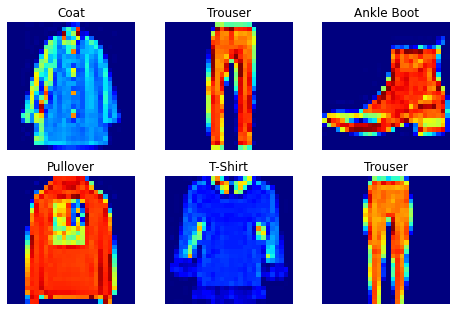

In [31]:
labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot',
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3

for i in range(1, cols + rows + 1):
    sample_idx = torch.randint(len(train), size=(1,)).item()
    img, label = train[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='jet')
plt.show();

# Creating a custom Dataset 

In [32]:
import os
import pandas as pd
from torchvision.io import read_image

In [33]:
class CustomImageDateset(Dataset):
 
# __init__ запускается один раз при создании экземпляра объекта Dataset 
# Мы инициализируем каталог, содержащий изображения, файл аннотаций и оба преобразования 

    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

# Функция __len__ возвращает количество выборок в нашем наборе данных.       
        
    def __len__(self):
        return len(self.img_labels)
    
#Функция __getitem__ загружает и возвращает образец из набора данных по заданному индексу idx
#На основе индекса он определяет расположение изображения на диске, преобразует его в тензор с помощью read_image, 
#извлекает соответствующую метку из данных csv в self.img_labels, 
#вызывает для них функции преобразования (если применимо) и возвращает тензорное изображение и соответствующую метку в кортеж
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx,0])
        image = read_image(img_path)
        label = self.ing_labels.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform([label])
        return image, label

# Preparing data for training with DataLoaders

The **Dataset** retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, and use Python’s **multiprocessing** to speed up data retrieval.<br>

**DataLoader** is an iterable that abstracts this complexity for us in an easy API.

In [34]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


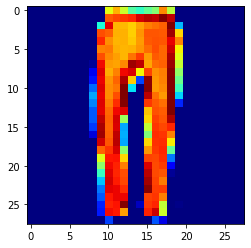

label: 1


In [42]:
# display image and label

train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')

img = train_features[0].squeeze()
label = train_labels[0]

plt.imshow(img, cmap='jet')
plt.show();
print(f'label: {label}')

# Transforms 

for training data<br>
***features*** as ***normalized*** tensors, - **ToTensor** <br>
***labels*** - as ***OneHotEncoded*** tensors - **Lambda**

All TorchVision datasets have two parameters
* **transform** - to modify *features*
* **target_transform** - to modify *labels*

In [44]:
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(root='data',
                          train=True,
                          download=True,
                          transform=ToTensor(),
                          target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)))

<a id='ToTensor()'></a>
### ToTensor()

**ToTensor** converts a PIL image or NumPy ndarray into a **FloatTensor**. and scales the image's pixel intensity values
in the range[0,1]

**Lambda Transforms**
<br>
apply any user-defined lambda func

In [45]:
target_transform = Lambda(lambda y: torch.zeros(10, #10 - number of labels in our dataset
                   dtype=torch.float).scatter_(dim=0, #calls scatter which assigns a value=1
                   index=torch.tensor(y),value=1)) #in the index as given by the label y

# Build the Neural Network
### Get Device for Training

In [46]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


### Define the Class

In [48]:
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(nn.Linear(28*28, 512),
                                              nn.ReLU(),
                                              nn.Linear(512, 512),
                                              nn.ReLU(),
                                              nn.Linear(512, 10))
    def forward(self, x):
        x=self.flatten(x)
        logits=self.linear_relu_stack(x)
        return logits

We created an example of NN and moving it to the **device** and print it's structure

In [49]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


To use the model we must **pass the input data**<br>
*This executes the model’s forward, along with some background operations. Do not call model.forward() directly!*

In [50]:
X = torch.rand(1,28,28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f'Predicted class: {y_pred}')

Predicted class: tensor([4])


## Model Layers

In [51]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


**nn.Linear**<br>
The linear layer is a module that applies a linear transformation on the input **using its stored weights and biases.**



In [54]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 784])
torch.Size([3, 20])


**nn.ReLU**<br>
Non-linear activations are what create the complex mappings between the model’s inputs and outputs. They are applied after linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena.



In [55]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.1008, -0.2885,  0.3573, -0.3053,  0.0100, -0.0300, -0.0553, -0.5678,
          0.1561, -0.0092,  0.7603, -0.3161, -0.1854, -0.1598,  0.6945, -0.0409,
          0.2833, -0.0873, -0.0921,  0.6589],
        [-0.1311, -0.2265,  0.1382, -0.2722, -0.2172, -0.2868,  0.1107, -0.1841,
         -0.5107,  0.0837,  0.2691, -0.1622, -0.4034, -0.0136,  0.0426, -0.1035,
          0.4145, -0.3742,  0.1324,  0.2496],
        [ 0.2344, -0.1922,  0.1264, -0.3666, -0.2629, -0.1084,  0.3915, -0.3547,
         -0.2452, -0.1371,  0.7106, -0.1495, -0.0756, -0.4178,  0.3214, -0.0628,
          0.3701, -0.0502,  0.0210,  0.2929]], grad_fn=<AddmmBackward>)


After ReLU: tensor([[0.1008, 0.0000, 0.3573, 0.0000, 0.0100, 0.0000, 0.0000, 0.0000, 0.1561,
         0.0000, 0.7603, 0.0000, 0.0000, 0.0000, 0.6945, 0.0000, 0.2833, 0.0000,
         0.0000, 0.6589],
        [0.0000, 0.0000, 0.1382, 0.0000, 0.0000, 0.0000, 0.1107, 0.0000, 0.0000,
         0.0837, 0.2691, 0.0000, 0.0000, 0.0000, 0.042

**nn.Sequential**<br>
nn.Sequential is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like seq_modules.


In [56]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

**nn.Softmax**<br>
The last linear layer of the neural network returns logits - raw values in [-infty, infty] - which are passed to the nn.Softmax module. The logits are scaled to values [0, 1] representing the model’s predicted probabilities for each class. dim parameter indicates the dimension along which the values must sum to 1.

In [57]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

## Model Parameters
Many layers inside a neural network are parameterized, i.e. have associated weights and biases that are optimized during training. Subclassing nn.Module automatically tracks all fields defined inside your model object, and makes all parameters accessible using your model’s parameters() or named_parameters() methods.

In [58]:
# In this example, we iterate over each parameter, and print its size and a preview of its values.

print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0191,  0.0017,  0.0196,  ...,  0.0346,  0.0311,  0.0006],
        [ 0.0157,  0.0277,  0.0327,  ...,  0.0264,  0.0287, -0.0242]],
       grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0131,  0.0035], grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0262, -0.0410, -0.0044,  ...,  0.0093, -0.0247, -0.0105],
        [-0.0433, -0.0415,  0.0210,  ..., -0.0223,  0.0414, -0.0374]],
       grad_fn=<SliceBackward>) 

Layer: linear_relu_stack.2.bias | S

## Hyperparameters
* N of epochs
  1. The train loop
  2. The validation/ Test loop
* Batch size
* learninf rate

# Loss func
* nn.MSELoss - **regression tasks**
* nn.NLLLoss (Negative Log Likelihood) - **classification tasks**
* nn.CrossEntropyLoss combines nn.LogSoftmax and nn.NLLLoss

In [60]:
# pass our model’s output logits to nn.CrossEntropyLoss, which will normalize the logits and compute the prediction error.
loss_fn = nn.CrossEntropyLoss()

# Optimizer
[Torch.Optim](https://pytorch.org/docs/stable/optim.html)

# Итогововый код для НС

In [59]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [63]:
# define train_loop that loops over the optimization code,
# and test_loop that evaluates the model's performance against our test data

def train_loop(dataloader, model, loss_fn, optimizer):
    size= len(dataloader.dataset)
    for batch, (X,y) in enumerate(dataloader):
        
        #compute prediction and loss
        pred=model(X)
        loss=loss_fn(pred, y)
        
        #Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch*len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    size=len(dataloader.dataset)
    num_batches=len(dataloader)
    test_loss, correct = 0,0
    
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [64]:
#We initialize the loss function and optimizer, 
# and pass it to train_loop and test_loop. 
# can increase the number of epochs for the model’s improving performance.

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

epochs = 10

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.288334  [    0/60000]
loss: 2.285249  [ 6400/60000]
loss: 2.257934  [12800/60000]
loss: 2.253871  [19200/60000]
loss: 2.238527  [25600/60000]
loss: 2.196038  [32000/60000]
loss: 2.211981  [38400/60000]
loss: 2.167125  [44800/60000]
loss: 2.160066  [51200/60000]
loss: 2.118974  [57600/60000]
Test Error: 
 Accuracy: 38.0%, Avg loss: 2.124165 

Epoch 2
-------------------------------
loss: 2.134717  [    0/60000]
loss: 2.131097  [ 6400/60000]
loss: 2.058769  [12800/60000]
loss: 2.078204  [19200/60000]
loss: 2.015528  [25600/60000]
loss: 1.949178  [32000/60000]
loss: 1.983135  [38400/60000]
loss: 1.890354  [44800/60000]
loss: 1.896444  [51200/60000]
loss: 1.812211  [57600/60000]
Test Error: 
 Accuracy: 59.8%, Avg loss: 1.821964 

Epoch 3
-------------------------------
loss: 1.856772  [    0/60000]
loss: 1.831879  [ 6400/60000]
loss: 1.702061  [12800/60000]
loss: 1.750267  [19200/60000]
loss: 1.624322  [25600/60000]
loss: 1.595428  [32000/600